In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import itertools


In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values
#36
#X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
#49X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause']]
#25X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
X = prosody_data.iloc[:, 6:].values
turkers_rating = pd.read_csv('turker_score_full_data.csv',sep=",")

In [3]:
turkers_rating.describe()

Overall  RecommendHiring    Colleague      Engaged      Excited  \
count  1378.000000      1378.000000  1378.000000  1378.000000  1378.000000   
mean      5.040012         4.949534     5.006499     5.429724     4.847967   
std       1.116603         1.227234     1.319357     1.331395     1.316147   
min       1.000000         1.000000     1.000000     1.000000     1.000000   
25%       4.000000         4.000000     4.000000     5.000000     4.000000   
50%       5.000000         5.000000     5.000000     6.000000     5.000000   
75%       6.000000         6.000000     6.000000     6.000000     6.000000   
max       7.000000         7.000000     7.000000     7.000000     7.000000   

       SpeakingRate    NoFillers     Friendly       Paused  EngagingTone  \
count   1378.000000  1378.000000  1378.000000  1378.000000   1378.000000   
mean       4.964078     4.167617     5.416482     5.579780      4.824233   
std        1.332089     1.634124     1.320745     1.349932      1.415769   
min        1.000000     1.000000     1.000000     0.000000      1.000000   
25%        4.000000     3.000000     5.000000     5.000000      4.000000   
50%        5.000000     4.000000     6.000000     6.000000      5.000000   
75%        6.000000     5.814916     6.000000     7.000000      6.000000   
max        7.000000     7.000000     7.000000     7.000000      7.000000   

       StructuredAnswers         Calm  NotStressed      Focused    Authentic  \
count        1378.000000  1378.000000  1378.000000  1378.000000  1378.000000   
mean            4.592604     5.424725     5.412052     5.687934     5.928504   
std             1.491571     1.371572     1.391639     1.179148     0.873895   
min             1.000000     1.000000     1.000000     1.000000     2.000000   
25%             4.000000     5.000000     5.000000     5.000000     5.543040   
50%             5.000000     6.000000     6.000000     6.000000     6.000000   
75%             6.000000     6.005935     6.486998     7.000000     6.601424   
max             7.000000     7.000000     7.000000     7.000000     7.000000   

        NotAwkward        Total  
count  1378.000000  1378.000000  
mean      4.956699    82.228444  
std       1.521431    12.662963  
min       1.000000    37.000000  
25%       4.000000    74.000000  
50%       5.000000    83.250000  
75%       6.000000    91.909135  
max       7.000000   109.000000

In [4]:
df=prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = prosody_data["Hired3C"],colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0,0 , 255)']],showscale = True),
        #line = dict(color = MRH,colorscale = 'Electric', showscale = True, cmin = -4000, cmax = -100),
         dimensions = list([
            dict(range = [min(df['duration']),max(df['duration'])], constraintrange = [1,2], label = 'duration', values = df['duration']),
            dict(range = [min(df['avgBand1']),max(df['avgBand1'])],label = 'Average Band1', values = df['avgBand1']),
            dict(range = [min(df['avgVal2']),max(df['avgVal2'])], label = 'avgVal2', values = df['avgVal2']),
            dict(range = [min(df['diffPitchMaxMode']),max(df['diffPitchMaxMode'])], label = 'diffPitchMaxMode', values = df['diffPitchMaxMode']),
            dict(range = [min(df['intensityMean']),max(df['intensityMean'])], label = 'intensityMean', values = df['intensityMean']),
            dict(range = [min(df['intensityMin']),max(df['intensityMin'])], label = 'intensityMin', values = df['intensityMin']),
            dict(range = [min(df['intensityQuant']),max(df['intensityQuant'])], label = 'intensityQuant', values = df['intensityQuant']),
            dict(range = [min(df['intensitySD']),max(df['intensitySD'])], label = 'intensitySD', values = df['intensitySD']),
            dict(range = [min(df['mean_pitch']),max(df['mean_pitch'])], label = 'mean_pitch', values = df['mean_pitch']),
            dict(range = [min(df['pitchUvsVRatio']),max(df['pitchUvsVRatio'])], label = 'pitchUvsVRatio', values = df['pitchUvsVRatio']),
            dict(range = [min(df['pitch_abs']),max(df['pitch_abs'])], label = 'pitch_abs', values = df['pitch_abs']),
            dict(range = [min(df['pitch_quant']),max(df['pitch_quant'])], label = 'pitch_quant', values = df['pitch_quant']),              
            dict(range = [min(df['pitch_sd']),max(df['pitch_sd'])], label = 'pitch_sd', values = df['pitch_sd']),            
            dict(range = [min(df['power']),max(df['power'])], label = 'Power', values = df['power'])
        ])
       
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [ ]:
df=prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = prosody_data["Hired3C"],colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0,0 , 255)']],showscale = True),
        #line = dict(color = MRH,colorscale = 'Electric', showscale = True, cmin = -4000, cmax = -100),
         dimensions = list([
            dict(range = [min(df['duration']),max(df['duration'])], constraintrange = [1,2], label = 'duration', values = df['duration']),
            dict(range = [min(df['avgBand1']),max(df['avgBand1'])],label = 'Average Band1', values = df['avgBand1']),
            dict(range = [min(df['avgVal2']),max(df['avgVal2'])], label = 'avgVal2', values = df['avgVal2']),
            dict(range = [min(df['diffPitchMaxMode']),max(df['diffPitchMaxMode'])], label = 'diffPitchMaxMode', values = df['diffPitchMaxMode']),
            dict(range = [min(df['intensityMean']),max(df['intensityMean'])], label = 'intensityMean', values = df['intensityMean']),
            dict(range = [min(df['intensityMin']),max(df['intensityMin'])], label = 'intensityMin', values = df['intensityMin']),
            dict(range = [min(df['intensityQuant']),max(df['intensityQuant'])], label = 'intensityQuant', values = df['intensityQuant']),
            dict(range = [min(df['intensitySD']),max(df['intensitySD'])], label = 'intensitySD', values = df['intensitySD']),
            dict(range = [min(df['mean_pitch']),max(df['mean_pitch'])], label = 'mean_pitch', values = df['mean_pitch']),
            dict(range = [min(df['pitchUvsVRatio']),max(df['pitchUvsVRatio'])], label = 'pitchUvsVRatio', values = df['pitchUvsVRatio']),
            dict(range = [min(df['pitch_abs']),max(df['pitch_abs'])], label = 'pitch_abs', values = df['pitch_abs']),
            dict(range = [min(df['pitch_quant']),max(df['pitch_quant'])], label = 'pitch_quant', values = df['pitch_quant']),              
            dict(range = [min(df['pitch_sd']),max(df['pitch_sd'])], label = 'pitch_sd', values = df['pitch_sd']),            
            dict(range = [min(df['power']),max(df['power'])], label = 'Power', values = df['power'])
        ])
       
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [20]:
df=prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch','mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio','intensitySD']]
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = prosody_data["Hired3C"],colorscale = [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0,0 , 255)']],showscale = True),
        #line = dict(color = MRH,colorscale = 'Electric', showscale = True, cmin = -4000, cmax = -100),
         dimensions = list([
            dict(range = [min(df['duration']),max(df['duration'])], constraintrange = [-12,12], label = 'duration', values = df['duration']),
            dict(range = [min(df['energy']),max(df['energy'])], label = 'energy', values = df['energy']),
            dict(range = [min(df['power']),max(df['power'])], label = 'power', values = df['power']),
            dict(range = [min(df['min_pitch']),max(df['min_pitch'])], label = 'min_pitch', values = df['min_pitch']),
            dict(range = [min(df['max_pitch']),max(df['max_pitch'])], label = 'max_pitch', values = df['max_pitch']),
            dict(range = [min(df['mean_pitch']),max(df['mean_pitch'])], label = 'mean_pitch', values = df['mean_pitch']),
            dict(range = [min(df['pitch_sd']),max(df['pitch_sd'])], label = 'pitch_sd', values = df['pitch_sd']), 
            dict(range = [min(df['pitch_abs']),max(df['pitch_abs'])], label = 'pitch_abs', values = df['pitch_abs']),
            dict(range = [min(df['pitch_quant']),max(df['pitch_quant'])], label = 'pitch_quant', values = df['pitch_quant']),
            dict(range = [min(df['pitchUvsVRatio']),max(df['pitchUvsVRatio'])], label = 'pitchUvsVRatio', values = df['pitchUvsVRatio']),
            dict(range = [min(df['intensitySD']),max(df['intensitySD'])], label = 'intensitySD', values = df['intensitySD']),
        ])
       
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [6]:
dA = pd.read_csv('prosodic_features_M1.csv ')
yRH = prosody_data['RecommendHiring']
cRH = prosody_data['Hired3C']

Text(0.5, 0, 'RecommendHiring')

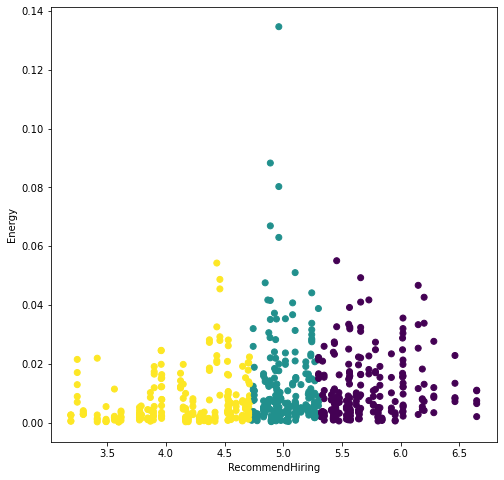

In [7]:

x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))




#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(yRH,x1, c=cRH, cmap= 'viridis_r')
plt.ylabel('Energy')
plt.xlabel('RecommendHiring')


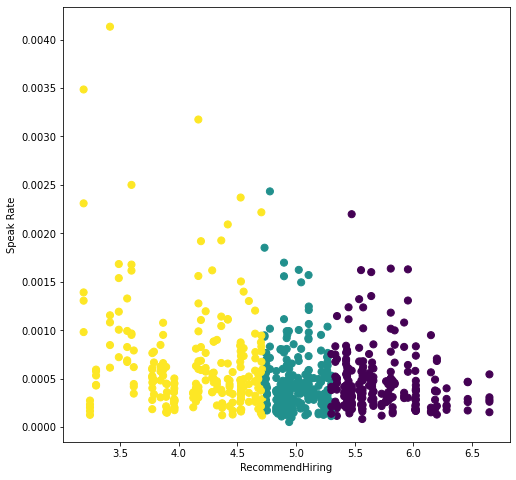

In [8]:
fig = plt.figure(figsize=(8,8))
plt.scatter(yRH,x2,c=cRH, cmap= 'viridis_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('RecommendHiring')
plt.show()

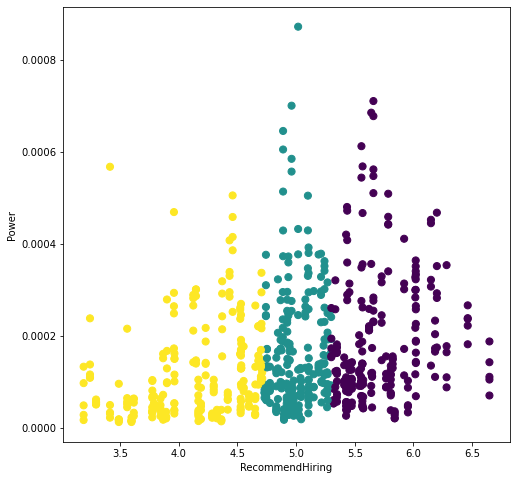

In [9]:
fig = plt.figure(figsize=(8,8))
x = prosody_data['power']
plt.scatter(yRH,x,c=cRH, cmap= 'viridis_r',s=50)
plt.ylabel('Power')
plt.xlabel('RecommendHiring')
plt.show()

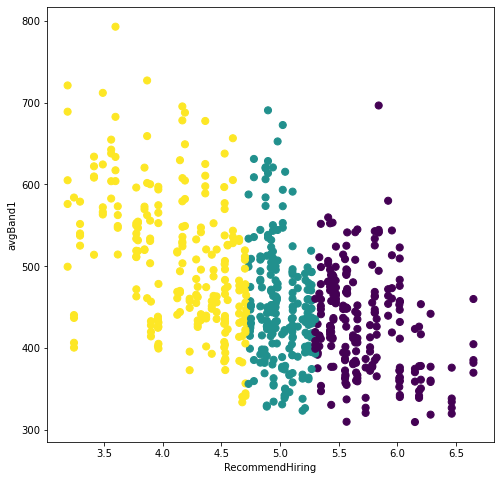

In [10]:
fig = plt.figure(figsize=(8,8))
plt.scatter(yRH,x3,c=cRH, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('RecommendHiring')
plt.show()

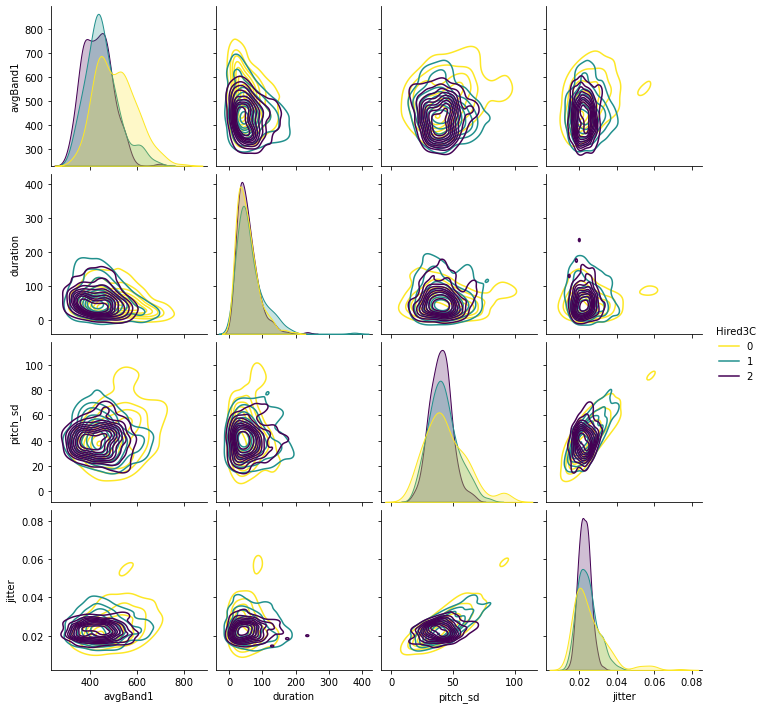

In [11]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','Hired3C']]
sns.pairplot(df1,hue='Hired3C',kind='kde',palette='viridis_r')

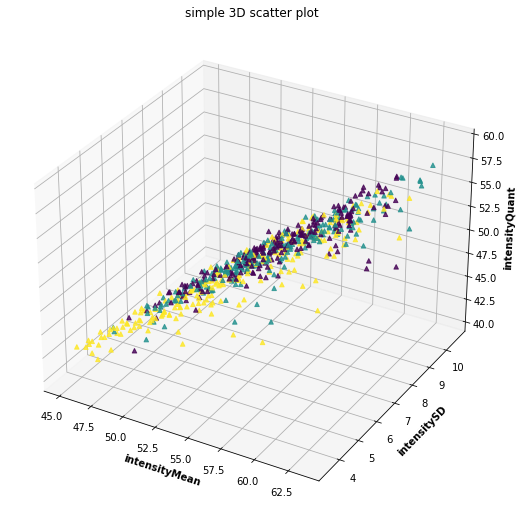

In [12]:
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('viridis_r')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cRH,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7,label = 'RecommendHiring', aspect = 5)

# show plot


plt.show()



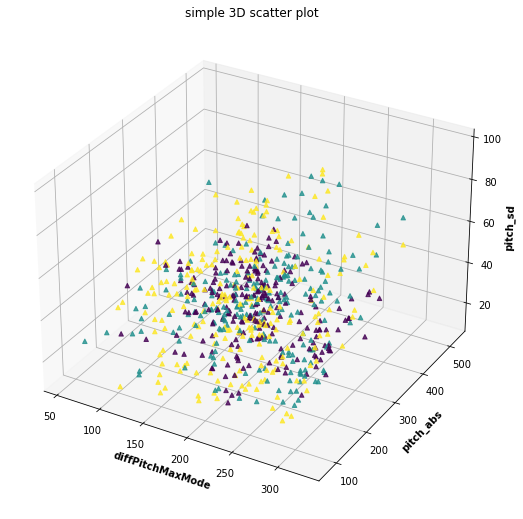

In [13]:
# Creating dataset
z = prosody_data['pitch_sd']
x = prosody_data['diffPitchMaxMode']
y = prosody_data['pitch_abs']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('viridis_r')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = cRH,
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('diffPitchMaxMode', fontweight ='bold')
ax.set_ylabel('pitch_abs', fontweight ='bold')
ax.set_zlabel('pitch_sd', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7,label = 'RecommendHiring', aspect = 5)


plt.show()



[Text(0.5, 0, 'RecommendHiring')]

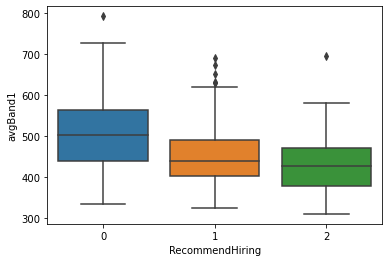

In [14]:
sns.boxplot(x=cRH, y='avgBand1',data= prosody_data).set(
    xlabel='RecommendHiring', 
)

['Not-Hired', 'Reserved', 'Hired']
Hired:  225
Reserved:  225
Not-Hired:  230


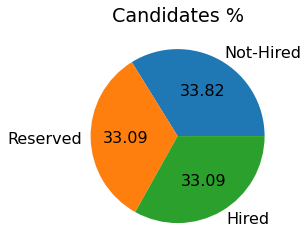

In [15]:
Hr = np.array(prosody_data['Hired3C'].value_counts())
arr = prosody_data['Hired3C']
lb = ['Not-Hired','Reserved','Hired']
print(lb)
plt.rcParams.update({'font.size':16})#figure.figsize':[10,10],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Candidates %")

arrLB = []
for i in arr:
    if(i==2):
        arrLB.append('Hired')
    elif(i==1):
        arrLB.append('Reserved')
    else:
        arrLB.append('Not-Hired')
print("Hired: ",arrLB.count('Hired'))
print("Reserved: ",arrLB.count('Reserved'))
print("Not-Hired: ",arrLB.count('Not-Hired'))


In [16]:
X = StandardScaler().fit_transform(X)
#X = MinMaxScaler().fit_transform(X)

In [17]:
#parallel cocordinate graph
# Import the library
import plotly.express as px

# Create the chart:
fig = px.parallel_coordinates(
    X, 
    color=prosody_data["Hired3C"], 
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=1)

# Hide the color scale that is useless in this case
fig.update_layout(coloraxis_showscale=False)

# Show the plot color_continuous_scale=px.colors.diverging.Tealrose,
fig.show()